⚠**Before you run this code**⚠

1.   Check and make sure you've downloaded the folder containing this notebook and the template spreadsheet to the home page of your Google Drive. It should be on the very first page you see when you open [Google Drive](https://drive.google.com/drive/my-drive). See the image example below with the relevant folder outlined in a red box.
2.   Make sure you've already finished entering and editing your metadata in the DPLA_Ingest_Spreadsheet.xlsx file within that folder. If you haven't done that, do that first. Make sure not to change any file names or folder names. **Note:** this program won't validate your XML like uploading it to the Digital Virginias github does--it'll just get your spreadsheet into XML that can be validated. It's up to you to read [Digital Virginia's information about metadata](https://www.digitalvirginias.org/for-contributors/metadata/).
3.   Have your Google login info handy if you don't already. This isn't sent to me or anything like that--basically, Google just needs permission to use Google Colaboratory (the Google app you're looking at now) to access the files in the folder you added to your Google Drive.

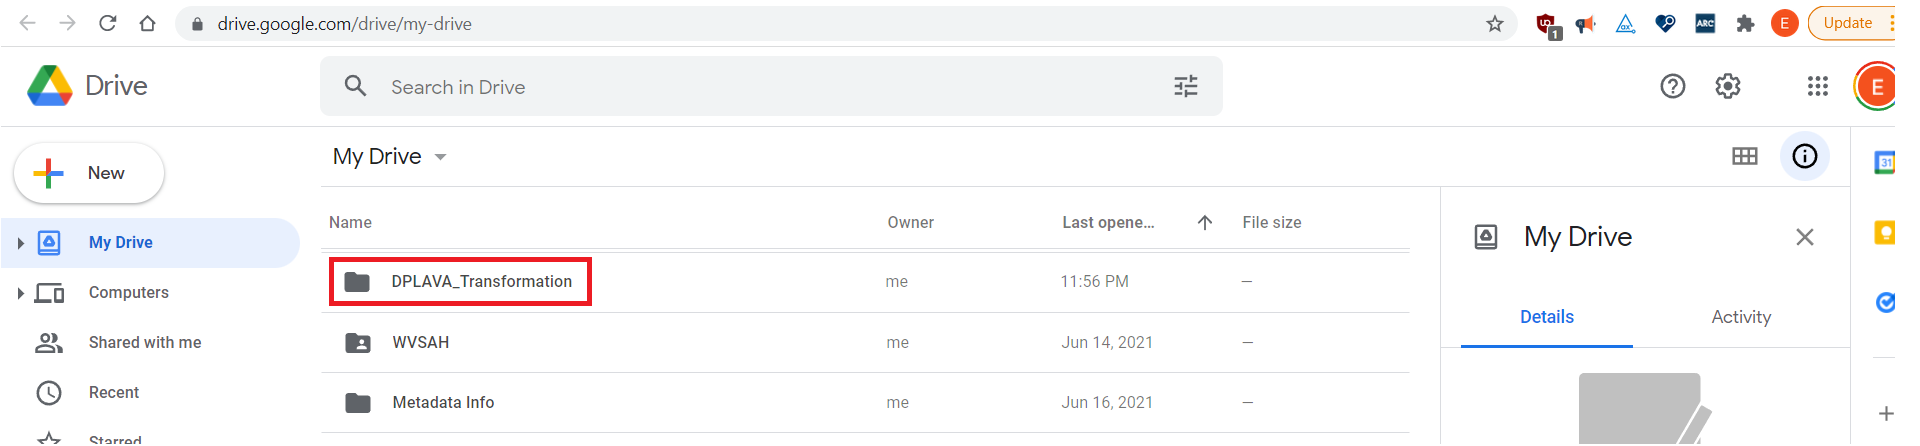


If you have those three things done: 🎉 Congrats! 🎉 That's a huge first step to making your unique materials sharable at a national level.

❓ If you have any questions or encounter any issues when following this mini-tutorial, please feel free to contact me, Elizabeth James, at elizabeth.james1@mail.wvu.edu. I'm always happy to answer any questions or talk through any issues you might have as part of this process.❓
_________________________________________________________________________

📖**How to use this Google Colaboratory Notebook:**📖

Next to blocks of code you'll see little boxes that look like this: `[  ]`

When you hover your mouse over that box, you'll see a play button (▶) in a circle. Make sure you press each play button for each block of code in order as you go down the page and don't skip any. 

_________________________________________________________________________


📋 Thanks for reading all of that! You'll never have to do it again--I promise. Let's get started. 📋

Press the play ▶ button on the following section of code by hovering your mouse over the `[  ]` on the left side of the rectangular block containing the code, Google Colaboratory will ask you for permission to access the folder of files that you edited and added to Google Drive. 

❗❗Google Colaboratory asks you to do this by clicking a link that will be output in the section of code where you will log in to your Google account and copy a confirmation code that you will then paste back into this Colaboratory document.❗❗ Paste the confirmation code into the same cell that you just hit the play ▶ button on and **press enter**. It may take up to 30 seconds to load, but a message that says "Mounted at /gdrive" will pop up. You can then move on to the next section of code.

In [ ]:
# This might be your first time seeing any kind of code, so I'm going to provide brief comments on what each section of code is 
# doing so you can understand what's happening to the information you put in the spreadsheet. First, I import a couple of coding 
# libraries so that Python (the coding language I'm using) can know how to read Excel files and csv files, which are two of the 
# most common file types for spreadsheets. 

import csv 
import pandas as pd
from google.colab import drive
drive.mount('/gdrive')
from google.colab import files      

Mounted at /gdrive


Again, press the play ▶ button on the following section of code by hovering your mouse over the `[  ]` on the left side of the rectangular block containing the code.

In [ ]:
# This portion of code reads the Excel sheet, changes it to a CSV (which is more friendly for Python to read), and opens the file 
# and formats it in a way for the program to use. Additionally, the code also tells the rest of the program where to find the 
# spreadsheet you completed and where to put the XML files we'll be creating.

input_file = pd.read_excel (r"/gdrive/MyDrive/DPLAVA_Transformation/DPLA_Ingest_Spreadsheet.xlsx", sheet_name='Template')
input_file.to_csv (r"/gdrive/MyDrive/DPLAVA_Transformation/DPLA_Ingest_Spreadsheet.csv", index = None, header=True)


input_file = "/gdrive/MyDrive/DPLAVA_Transformation/DPLA_Ingest_Spreadsheet.csv"
output_folder = "/gdrive/MyDrive/DPLAVA_Transformation/Output_XML/"
csvfile = open((input_file), newline='', encoding='utf-8')             
filecontent = csv.reader(csvfile)
filecontent = list(filecontent)
filecontent=filecontent[1::]    
recordcount = 0

For the last time, press the play ▶ button on the following section of code by hovering your mouse over the `[  ]` on the left side of the rectangular block containing the code.

You'll see a list of all of the lovely records you've created at the end when you scroll to the end of the block of code.


In [ ]:
# This next block looks complicated, but really it's just the same few straightforward bits of code repeated multiple times. 
# In the first part following "xmlString" we're creating the first text of the XML file that's required for DPLA to understand 
# the record. Then, we create what are called variables to contain each the values we entered in each field. 

# Once we've created those variables, we put the information from each row in each of those variables and create a complete XML 
# file by adding all of those variables together. For fields with multiple values, the program looks for the semicolon in each 
# field to create multiple values to add to the XML file. 

# Each row is then output in the Output_XML folder within the DPLA_Transformation folder you copied to your Google Drive as one 
# complete record per file. The files are named after the identifiers you provided in the spreadsheet.

for i in filecontent:    
    #print(i)
    xmlString = r'<?xml version="1.0" encoding="UTF-8"?><mdRecord xmlns="http://dplava.lib.virginia.edu" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:dcterms="http://purl.org/dc/terms/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#" xmlns:edm="http://www.europeana.eu/schemas/edm/" xmlns:xs="http://www.w3.org/2001/XMLSchema" xsi:schemaLocation="http://dplava.lib.virginia.edu/dplava.xsd">'
    collection=""
    creator= ""
    dataProvider= ""
    date= ""
    description= ""
    extent= ""
    formatmed= ""
    identifier= ""
    isShownAt= ""
    language= ""
    place= ""
    preview=""
    publisher=""
    rightsStatement=""
    subject=""
    subtype=""
    temporalCoverage=""
    title=""
    typemajor=""    
    if i[0].strip() != "":
        if ";" in i[0]:
            workingcoll = i[0]
            while ";" in workingcoll: 
                singlecoll = workingcoll[:workingcoll.index(";")]
                collection = collection + "<dcterms:isPartOf>" + singlecoll.strip() + "</dcterms:isPartOf>"
                workingcoll = workingcoll[workingcoll.index(";")+1::]
                if ";" not in workingcoll:
                    collection = collection + "<dcterms:isPartOf>" + workingcoll.strip() + "</dcterms:isPartOf>"      
                    if "&" in collection:
                      collection = collection.replace("&","&amp;")    
        else:
            if "&" in i[0]:
              i[0] = i[0].replace("&","&amp;")
            collection="<dcterms:isPartOf>"+i[0]+"</dcterms:isPartOf>"   
    if i[1].strip() != "":    
        if ";" in i[1]:
            workingcreator = i[1]
            while ";" in workingcreator: 
                singlecreator = workingcreator[:workingcreator.index(";")]
                creator = creator + "<dcterms:creator>" + singlecreator.strip() + "</dcterms:creator>"
                workingcreator = workingcreator[workingcreator.index(";")+1::]
                if ";" not in workingcreator:
                    creator = creator + "<dcterms:creator>" + workingcreator.strip() + "</dcterms:creator>"  
                    if "&" in creator:
                      creator = creator.replace("&","&amp;")        
        else:
            if "&" in i[1]:
              i[1] = i[1].replace("&","&amp;")
            creator= "<dcterms:creator>"+ i[1]+"</dcterms:creator>"  
    if i[2].strip() != "":
        if "&" in i[2]:
              i[2] = i[2].replace("&","&amp;")
        dataProvider= "<dcterms:provenance>" + i[2] + "</dcterms:provenance>"        
    if i[3].strip() != "":
        if "&" in i[3]:
              i[3] = i[3].replace("&","&amp;")
        date= "<dcterms:created>"+i[3]+"</dcterms:created>"
    if i[4].strip() != "":
        if "&" in i[4]:
              i[4] = i[4].replace("&","&amp;")
        description= "<dcterms:description>"+i[4]+"</dcterms:description>"  
    if i[5].strip() != "":
        if ";" in i[5]:
            workingextent = i[5]
            while ";" in workingextent: 
                singleextent = workingextent[:workingextent.index(";")]
                extent = extent + "<dcterms:extent>" + singleextent.strip() + "</dcterms:extent>"
                workingextent = workingextent[workingextent.index(";")+1::]
                if ";" not in workingextent:
                    extent = extent + "<dcterms:extent>" + workingextent.strip() + "</dcterms:extent>"    
                    if "&" in extent:
                      extent = extent.replace("&","&amp;")       
        else:
            if "&" in i[5]:
              i[5] = i[5].replace("&","&amp;")
            extent= "<dcterms:extent>"+i[5]+"</dcterms:extent>"  

    if i[6].strip() != "":
        if ";" in i[6]:
            workingformatmed = i[6]
            while ";" in workingformatmed: 
                singleformatmed = workingformatmed[:workingformatmed.index(";")]
                formatmed = formatmed + "<dcterms:medium>" + singleformatmed.strip() + "</dcterms:medium>"
                workingformatmed = workingformatmed[workingformatmed.index(";")+1::]
                if ";" not in workingformatmed:
                    formatmed = formatmed + "<dcterms:medium>" + workingformatmed.strip() + "</dcterms:medium>"   
                    if "&" in formatmed:
                      formatmed = formatmed.replace("&","&amp;")        
        else:
          if "&" in i[6]:
              i[6] = i[6].replace("&","&amp;")
          formatmed= "<dcterms:medium>" + i[6] + "</dcterms:medium>" 

    if i[7].strip() != "":
        if "&" in i[7]:
              i[7] = i[7].replace("&","&amp;")
        identifier= "<dcterms:identifier>"+i[7]+"</dcterms:identifier>"
    if i[8].strip() != "":
        if "&" in i[8]:
              i[8] = i[8].replace("&","&amp;")
        isShownAt= "<edm:isShownAt>"+i[8]+"</edm:isShownAt>"
    if i[9].strip() != "":
        if ";" in i[9]:
            workinglanguage = i[9]
            while ";" in workinglanguage: 
                singlelanguage = workinglanguage[:workinglanguage.index(";")]
                language = language + "<dcterms:language>" + singlelanguage.strip() + "</dcterms:language>"
                workinglanguage = workinglanguage[workinglanguage.index(";")+1::]
                if ";" not in workinglanguage:
                    language = language + "<dcterms:language>" + workinglanguage.strip() + "</dcterms:language>" 
                    if "&" in language:
                      language = language.replace("&","&amp;")          
        else:
          if "&" in i[9]:
              i[9] = i[9].replace("&","&amp;")
          language= "<dcterms:language>"+i[9]+"</dcterms:language>"

    if i[10].strip() != "":
        if ";" in i[10]:
            workingplace = i[10]
            while ";" in workingplace: 
                singleplace = workingplace[:workingplace.index(";")]
                place = place + "<dcterms:spatial>" + singleplace.strip() + "</dcterms:spatial>"
                workingplace = workingplace[workingplace.index(";")+1::]
                if ";" not in workingplace:
                    place = place + "<dcterms:spatial>" + workingplace.strip() + "</dcterms:spatial>" 
                    if "&" in place:
                      place = place.replace("&","&amp;")          
        else:
          if "&" in i[10]:
              i[10] = i[10].replace("&","&amp;")
          place= "<dcterms:spatial>"+i[10]+"</dcterms:spatial>"

    if i[11].strip() != "":
        if "&" in i[11]:
            i[11] = i[11].replace("&","&amp;")
        preview="<edm:preview>"+i[11]+"</edm:preview>"
    if i[12].strip() != "":
        if ";" in i[12]:
            workingpublisher = i[12]
            while ";" in workingpublisher: 
                singlepublisher = workingpublisher[:workingpublisher.index(";")]
                publisher = publisher + "<dcterms:publisher>" + singlepublisher.strip() + "</dcterms:publisher>"
                workingpublisher = workingpublisher[workingpublisher.index(";")+1::]
                if ";" not in workingpublisher:
                    publisher = publisher + "<dcterms:publisher>" + workingpublisher.strip() + "</dcterms:publisher>"  
                    if "&" in publisher:
                      publisher = publisher.replace("&","&amp;")         
        else:
          if "&" in i[12]:
              i[12] = i[12].replace("&","&amp;")
          publisher="<dcterms:publisher>"+i[12]+"</dcterms:publisher>"

    if i[13].strip() != "":
        if i[13].strip()=="IN COPYRIGHT":
          i[13]="https://rightsstatements.org/vocab/InC/1.0/"
        elif i[13].strip()=="IN COPYRIGHT - EU ORPHAN WORK":
          i[13]="https://rightsstatements.org/vocab/InC-OW-EU/1.0/"
        elif i[13].strip()=="IN COPYRIGHT - EDUCATIONAL USE PERMITTED":
          i[13]="https://rightsstatements.org/vocab/InC-EDU/1.0/"
        elif i[13].strip()=="IN COPYRIGHT - NON-COMMERCIAL USE PERMITTED":
          i[13]="https://rightsstatements.org/vocab/InC-NC/1.0/"
        elif i[13].strip()=="IN COPYRIGHT - RIGHTS-HOLDER UNLOCATABLE OR UNIDENTIFIABLE": 
          i[13]="https://rightsstatements.org/vocab/InC-RUU/1.0/"
        elif i[13].strip()=="NO COPYRIGHT - CONTRACTUAL RESTRICTIONS":
          i[13]="https://rightsstatements.org/vocab/NoC-CR/1.0/"
        elif i[13].strip()=="NO COPYRIGHT - NON-COMMERCIAL USE ONLY":
          i[13]="https://rightsstatements.org/vocab/NoC-NC/1.0/"
        elif i[13].strip()=="NO COPYRIGHT - OTHER KNOWN LEGAL RESTRICTIONS":
          i[13]="https://rightsstatements.org/vocab/NoC-OKLR/1.0/"
        elif i[13].strip()=="NO COPYRIGHT - UNITED STATES":
          i[13]="https://rightsstatements.org/vocab/NoC-US/1.0/"
        elif i[13].strip()=="COPYRIGHT NOT EVALUATED":
          i[13]="https://rightsstatements.org/vocab/CNE/1.0/"
        elif i[13].strip()=="COPYRIGHT UNDETERMINED":
          i[13]="https://rightsstatements.org/vocab/UND/1.0/"
        elif i[13].strip()=="NO KNOWN COPYRIGHT":
          i[13]="https://rightsstatements.org/vocab/NKC/1.0/"
        elif i[13].strip()=="Attribution 4.0 International (CC BY 4.0)":
          i[13]="https://creativecommons.org/licenses/by/4.0/"
        elif i[13].strip()=="Attribution-ShareAlike 4.0 International (CC BY-SA 4.0)":
          i[13]="https://creativecommons.org/licenses/by-sa/4.0/"
        elif i[13].strip()=="Attribution-NoDerivatives 4.0 International (CC BY-ND 4.0)":
          i[13]="https://creativecommons.org/licenses/by-nd/4.0/"
        elif i[13].strip()=="Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)":
          i[13]="https://creativecommons.org/licenses/by-nc/4.0/"
        elif i[13].strip()=="Attribution-NonCommercial-ShareAlike 4.0 International (CC BY-NC-SA 4.0)":
          i[13]="https://creativecommons.org/licenses/by-nc-sa/4.0/"
        elif i[13].strip()=="Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)":
          i[13]="https://creativecommons.org/licenses/by-nc-nd/4.0/"
        elif i[13].strip() == "Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)" :
          i[13]="https://rightsstatements.org/vocab/CNE/1.0/"
        else: 
          print(i[13] + "is a problem.")
        if "&" in i[13]:
              i[13] = i[13].replace("&","&amp;")
        rightsStatement="<dcterms:rights>"+i[13]+"</dcterms:rights>"        
    if i[14].strip() != "":
        if ";" in i[14]:
            workingsub = i[14]
            while ";" in workingsub: 
                singlesub = workingsub[:workingsub.index(";")]
                subject = subject + "<dcterms:subject>" + singlesub.strip() + "</dcterms:subject>"
                workingsub = workingsub[workingsub.index(";")+1::]
                if ";" not in workingsub:
                    subject = subject + "<dcterms:subject>" + workingsub.strip() + "</dcterms:subject>"   
                    if "&" in subject:
                      subject = subject.replace("&","&amp;")        
        else:
            if "&" in i[14]:
              i[14] = i[14].replace("&","&amp;")
            subject="<dcterms:subject>"+i[14]+"</dcterms:subject>"        
    if i[15].strip() != "":
        if ";" in i[15]:
            workingsubtype = i[15]
            while ";" in workingsubtype: 
                singlesubtype = workingsubtype[:workingsubtype.index(";")]
                subtype = subtype + "<edm:hasType>" + singlesubtype.strip() + "</edm:hasType>"
                workingsubtype = workingsubtype[workingsubtype.index(";")+1::]
                if ";" not in workingsubtype:
                    subtype = subtype + "<edm:hasType>" + workingsubtype.strip() + "</edm:hasType>"   
                    if "&" in subtype:
                      subtype = subtype.replace("&","&amp;")        
        else:
          if "&" in i[15]:
              i[15] = i[15].replace("&","&amp;")
          subtype="<edm:hasType>"+i[15]+"</edm:hasType>"

    if i[16].strip() != "":
        if ";" in i[16]:
            workingTemporalCoverage = i[16]
            while ";" in workingTemporalCoverage: 
                singleTemporalCoverage = workingTemporalCoverage[:workingTemporalCoverage.index(";")]
                temporalCoverage = temporalCoverage + "<dcterms:temporal>" + singleTemporalCoverage.strip() + "</dcterms:temporal>"
                workingTemporalCoverage = workingTemporalCoverage[workingTemporalCoverage.index(";")+1::]
                if ";" not in workingTemporalCoverage:
                    temporalCoverage = temporalCoverage + "<dcterms:temporal>" + workingTemporalCoverage.strip() + "</dcterms:temporal>"         
                    if "&" in temporalCoverage:
                      temporalCoverage = temporalCoverage.replace("&","&amp;") 
        else:
          if "&" in i[16]:
              i[16] = i[16].replace("&","&amp;")
          temporalCoverage="<dcterms:temporal>"+i[16]+"</dcterms:temporal>"

    if i[17].strip() != "":
        if "&" in i[17]:
              i[17] = i[17].replace("&","&amp;")
        title="<dcterms:title>"+i[17]+"</dcterms:title>"      
    if i[18].strip() != "":
        if ";" in i[18]:
            workingTypemajor = i[18]
            while ";" in workingTypemajor: 
                singleTypemajor = workingTypemajor[:workingTypemajor.index(";")]
                typemajor = typemajor + "<dcterms:type>" + singleTypemajor.strip() + "</dcterms:type>"
                workingTypemajor = workingTypemajor[workingTypemajor.index(";")+1::]
                if ";" not in workingTypemajor:
                    typemajor = typemajor + "<dcterms:type>" + workingTypemajor.strip() + "</dcterms:type>"     
                    if "&" in typemajor:
                      typemajor = typemajor.replace("&","&amp;")    
        else:
          if "&" in i[18]:
              i[18] = i[18].replace("&","&amp;")
          typemajor="<dcterms:type>"+i[18]+"</dcterms:type>"

    if collection != "":
        xmlString = xmlString + collection
    if creator != "":
        xmlString = xmlString + creator
    if dataProvider != "":
        xmlString = xmlString + dataProvider
    if date!= "":
        xmlString = xmlString + date
    if description!= "":
        xmlString = xmlString + description
    if extent!= "":
        xmlString = xmlString + extent
    if formatmed!= "":
        xmlString = xmlString + formatmed
    if identifier!= "": 
        xmlString = xmlString + identifier
    if isShownAt!= "":
        xmlString = xmlString + isShownAt
    if language!= "":
        xmlString = xmlString + language
    if place!= "": 
        xmlString = xmlString + place
    if preview!= "":
        xmlString = xmlString + preview
    if publisher!= "":
        xmlString = xmlString + publisher
    if rightsStatement != "":
        xmlString = xmlString + rightsStatement
    if subject != "":
        xmlString = xmlString + subject
    if subtype != "":
        xmlString = xmlString + subtype
    if temporalCoverage != "":
        xmlString = xmlString + temporalCoverage
    if title != "":
        xmlString = xmlString + title
    if typemajor != "":
        xmlString = xmlString + typemajor
    xmlString = xmlString + "</mdRecord>"
    filelocation = "/gdrive/MyDrive/DPLAVA_Transformation/Output_XML/" + i[7] + ".xml"
    recordcount+=1
    with open(filelocation, 'w') as f:
        f.write(xmlString)
        
print("You have converted " + str(recordcount) + " records.")

You have converted 11 records.


🎉🥳 Congratulations! 🥳🎉

That's it! You've officially used Python to make your life easier and share some of the great metadata and collections you steward. Your XML records were output to the `Output_XML` folder that is now located in the `DPLAVA_Transformation` folder you downloaded. 

Now, the next step is to upload your metadata to the [github repository](https://github.com/dplava/) created for your institution by the wonderful folks with Digital Virginias and see what errors, if any, pop up during upload.

I'm always looking to improve the tools and workflows available to institutions to share their collections: if you were confused at any point in this walkthrough or encountered an error, please feel free to contact me, Elizabeth James, at elizabeth.james1@mail.wvu.edu to let me know how I can make this resource better. 